### PROCEDURE
##### Extract Data Using SQL QUERIES  and Export to CSV
##### Analyze data using pandas and matplotlib libraries in python 
##### Visualize Data
##### Observations
##### Further Analysis

### EXTRACTING DATA USING SQL QUERIES

###### To extract and view the list of cities
select * from city_list 
###### To extract city temperature data
select * from city_data where city = ‘Lagos’ 
###### To extract global temperature data
select * from global_data  
 


### CITY TEMPERATURE ANALYSIS

The closest big city to where I live is Lagos

In [1]:
#importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#To display entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',  None)



In [2]:
# reading the CSV file

lagos_temp = pd.read_csv('C:/Users/user/Desktop/1.coding_datascience/UDACITY NANO DEGREE data analyst/city_lagos_data.csv')

In [3]:
#exploring the columns and some few rows

lagos_temp.head()

,year,city,country,avg_temp
0,1849,Lagos,Nigeria,25.98
1,1850,Lagos,Nigeria,25.87
2,1851,Lagos,Nigeria,26.10
3,1852,Lagos,Nigeria,NaN
4,1853,Lagos,Nigeria,NaN


In [4]:
# getting more information about the data

lagos_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
year        165 non-null int64
city        165 non-null object
country     165 non-null object
avg_temp    151 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [5]:
#checking for missing data
#there are 14 missing data in the avg_temp column

lagos_temp.isnull().sum()

year         0
city         0
country      0
avg_temp    14
dtype: int64

In [6]:
#replacing missing data with mean: 
#lagos average temperture ranges between 25 degree Celsius and 27 degree Celsius

for i in ['avg_temp']:
    lagos_temp[i] = lagos_temp[i].fillna(value = lagos_temp[i].mean())
    

In [7]:
#confirming there are no more missing data

lagos_temp.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

In [8]:
#missing data has been replaced with the mean(26.553113)
lagos_temp.head()

,year,city,country,avg_temp
0,1849,Lagos,Nigeria,25.980000
1,1850,Lagos,Nigeria,25.870000
2,1851,Lagos,Nigeria,26.100000
3,1852,Lagos,Nigeria,26.553113
4,1853,Lagos,Nigeria,26.553113


In [9]:
#to calculate 20years, 100years moving average temperature

lagos_temp['20years MA_lagos (deg. C)'] = lagos_temp.avg_temp.rolling(window=20).mean()
lagos_temp['100years MA_lagos (deg. C)'] = lagos_temp.avg_temp.rolling(window=100).mean()

In [10]:
# renaming the avg_temp column to include temperature celsius unit

lagos_temp = lagos_temp.rename(columns = {'avg_temp': 'lagos_avg_temp (deg. C)'}, inplace = False)


In [11]:
lagos_temp.describe()

,year,lagos_avg_temp (deg. C),20years MA_lagos (deg. C),100years MA_lagos (deg. C)
count,165.000000,165.000000,146.000000,66.000000
mean,1931.000000,26.553113,26.524611,26.526524
std,47.775517,0.518566,0.388154,0.159520
min,1849.000000,24.860000,25.750500,26.330936
25%,1890.000000,26.280000,26.283897,26.400832
50%,1931.000000,26.600000,26.661500,26.468500
75%,1972.000000,26.900000,26.806375,26.659150
max,2013.000000,27.790000,27.246000,26.857200


### GLOBAL TEMPERATURE ANALYSIS

In [12]:
# reading the CSV file
global_temp = pd.read_csv('C:/Users/user/Desktop/1.coding_datascience/UDACITY NANO DEGREE data analyst/global_data.csv')

In [13]:
#exploring the columns and some few rows

global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [14]:
# getting more information about the data

global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [15]:
#checking for missing data
#there are no missing data

global_temp.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [16]:
#to calculate 20years, 100years moving average temperature for global

global_temp['20years MA_global (deg. C)'] = global_temp.avg_temp.rolling(window=20).mean()
global_temp['100years MA_global (deg. C)'] = global_temp.avg_temp.rolling(window=100).mean()

In [17]:
# renaming the avg_temp column to include temperature celsius unit

global_temp = global_temp.rename(columns = {'avg_temp': 'global_avg_temp (deg. C)'}, inplace = False)

In [18]:
global_temp.describe()

,year,global_avg_temp (deg. C),20years MA_global (deg. C),100years MA_global (deg. C)
count,266.000000,266.000000,247.000000,167.000000
mean,1882.500000,8.369474,8.336142,8.255404
std,76.931788,0.584747,0.393107,0.244739
min,1750.000000,5.780000,7.621500,7.988800
25%,1816.250000,8.082500,8.080000,8.034050
50%,1882.500000,8.375000,8.243000,8.163600
75%,1948.750000,8.707500,8.644500,8.432100
max,2015.000000,9.830000,9.486000,8.838500


### VISUALIZATIONS

Text(0, 0.5, 'temperature (deg. C)')

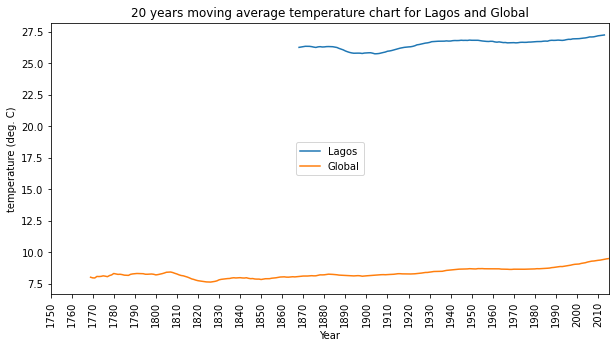

In [23]:
# comparing lagos and global line chart in the same plot


lagos_temp.index = pd.Index(lagos_temp.year)
global_temp.index = pd.Index(global_temp.year)

lag_temp = lagos_temp[['20years MA_lagos (deg. C)']]
glob_temp = global_temp[['20years MA_global (deg. C)']]

ax = lag_temp.plot.line(figsize=(10, 5), title='20 years moving average temperature chart for Lagos and Global')
glob_temp.plot.line(ax=ax)

ax.legend(["Lagos", "Global"], loc='center')
ax.set_xticks(global_temp.index[::10])
ax.set_xticklabels(global_temp.index[::10], rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("temperature (deg. C)")




Text(0, 0.5, 'temperature(deg. C)')

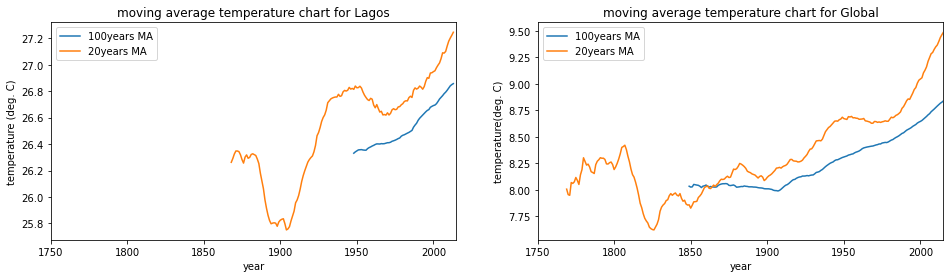

In [24]:
# comparing lagos and global line chart in separate plots


lagos_temp.index = pd.Index(lagos_temp.year)
global_temp.index = pd.Index(global_temp.year)

lag_temp = lagos_temp[['100years MA_lagos (deg. C)', '20years MA_lagos (deg. C)']]
glob_temp = global_temp[['100years MA_global (deg. C)', '20years MA_global (deg. C)']]



figure, axes = plt.subplots(1, 2, sharex=True)

lag_temp.plot(ax=axes[0], figsize=(16, 4), title='moving average temperature chart for Lagos')
glob_temp.plot(ax=axes[1], title='moving average temperature chart for Global')

axes[0].legend(["100years MA", "20years MA"], loc='upper left')
axes[1].legend(["100years MA", "20years MA"], loc='upper left')
axes[0].set_ylabel("temperature (deg. C)")
axes[1].set_ylabel("temperature(deg. C)")



### OBSERVATIONS



###### Similarities


    1. The world as well as my city is getting hotter 
    
    2. the difference in temperature fluctuates for both city and global
    
    3. the overall trend is on the increase
    
    4. generally, they both have positive temperature gradient
    


###### Differences
    1. my city temperature is much higher than the global temperature

    2. the global temperature has a wider range (4.05 deg. C) than my city temperature (2.93 deg. C) 
    
    3. There is no temperature data for my city for years earlier than 1849
 
    4. some temperature data where not available in my city in some years (missing data)
 

### CONSIDERATIONS FOR VISUALIZATION

    1.   I maintaned the same scale for better comparison

    2.   I viewed the plots on the same chart

    3.   I also viewed the plots on different charts to see details of fluctuations

    4.   I plotted more than one moving average to help see the trends better


### CONCLUSION

according to (climaterealityproject.org), 1.5 degree celsius  rise in temperature has been said to be danger line for global warming. 

according to (climate.nasa.gov), if global Increase in temperature get to 2 degrees celsius, more than 70 percent of earth's coastlines will see sea-level rise greater than 0.66 feets resulting in increased coastal flooding, salinazation of water supplies and beach erosion among other impacts on human and ecological systems 

national ocienic and atmospheric administration, one of the most immediate and obvious effect of global warming is the increase in temperature around the world. the average global temperature has increased by about 0.8 degree celsius over the past 100 years (livescience.com) 

##### based on this data, there is global warming as temperature has risen more than 1 degree celsius in the last 100 years







### FURTHER ANALYSIS

###### What is Correlation Coefficient?

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0

In [19]:
lagos_global_temp = global_temp.merge(lagos_temp, on = 'year', how = 'left').drop(['city','country',], axis=1, inplace=False)

In [21]:
lagos_global_temp.head()

,year,global_avg_temp (deg. C),20years MA_global (deg. C),100years MA_global (deg. C),lagos_avg_temp (deg. C),20years MA_lagos (deg. C),100years MA_lagos (deg. C)
0,1750,8.72,NaN,NaN,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN,NaN,NaN
4,1754,8.47,NaN,NaN,NaN,NaN,NaN


In [22]:
lagos_global_temp.corr(method ='pearson')

,year,global_avg_temp (deg. C),20years MA_global (deg. C),100years MA_global (deg. C),lagos_avg_temp (deg. C),20years MA_lagos (deg. C),100years MA_lagos (deg. C)
year,1.000000,0.622775,0.799960,0.937102,0.694096,0.818863,0.962916
global_avg_temp (deg. C),0.622775,1.000000,0.775097,0.895913,0.787121,0.794404,0.902195
20years MA_global (deg. C),0.799960,0.775097,1.000000,0.961803,0.718834,0.886210,0.953753
100years MA_global (deg. C),0.937102,0.895913,0.961803,1.000000,0.720502,0.861011,0.993832
lagos_avg_temp (deg. C),0.694096,0.787121,0.718834,0.720502,1.000000,0.778381,0.769031
20years MA_lagos (deg. C),0.818863,0.794404,0.886210,0.861011,0.778381,1.000000,0.877283
100years MA_lagos (deg. C),0.962916,0.902195,0.953753,0.993832,0.769031,0.877283,1.000000


### Strong Positive Correlation 

There is a strong positive correlation of (0.787121) between the city average temperature and the global average temperature. it shows that an increase in temperature in my city contributes to the increase in the global temperature

In [26]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


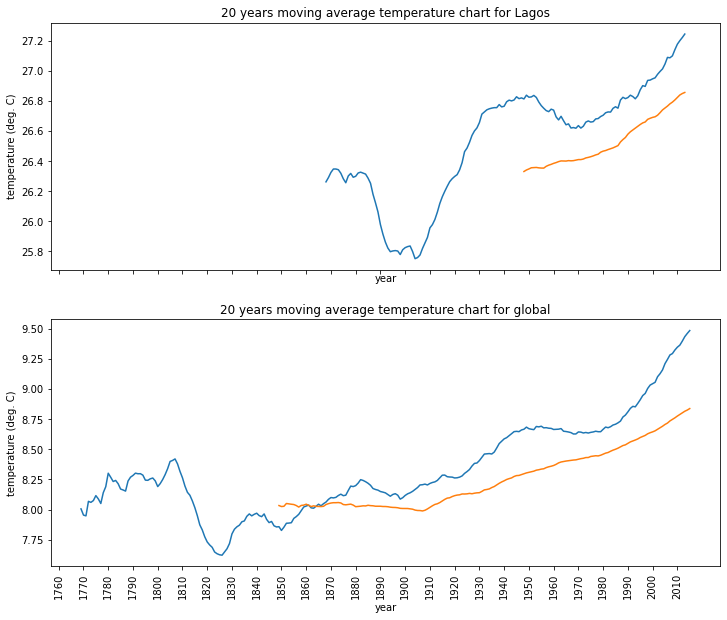

In [26]:
# plotting moving average temperature



fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10), sharex=True)

ax1.set_xticks(lagos_global_data.index[::10])
ax1.set_xlabel('year')
ax1.set_ylabel('temperature (deg. C)')
ax1.set_title('20 years moving average temperature chart for Lagos')


ax2.set_xticks(lagos_global_data.index[::10])
ax2.set_xlabel('year')
ax2.set_ylabel('temperature (deg. C)')
ax2.set_title('20 years moving average temperature chart for global')

degrees = 90
plt.xticks(rotation=degrees)
ax1.plot(lagos_global_data.index, lagos_global_data[['20years MA_lagos (deg. C)', '100years MA_lagos (deg. C)']])
ax2.plot(lagos_global_data.index, lagos_global_data[['20years MA_global (deg. C)', '100years MA_global (deg. C)']])






Text(0, 0.5, '100years moving average temp')

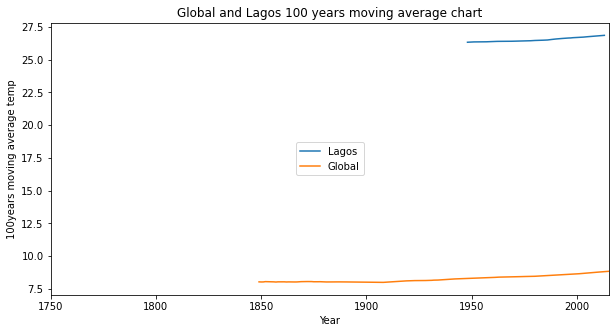

In [27]:
lag_temp = lagos_temp[['100years MA']]
glob_temp = global_temp[['100years MA']]

ax = lag_temp.plot.line(figsize=(10, 5), title='Global and Lagos 100 years moving average chart')
glob_temp.plot.line(ax=ax)

ax.legend(["Lagos", "Global"], loc='center')

ax.set_xlabel("Year")
ax.set_ylabel("100years moving average temp")



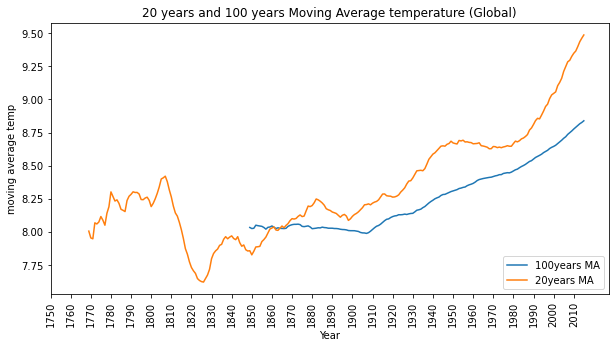

In [25]:
plt.figure(figsize=(10, 5))
plt.title('20 years and 100 years Moving Average temperature (Global)')
plt.plot(global_temp.index, global_temp[['100years MA', '20years MA']])
plt.xlabel('Year')
plt.ylabel('moving average temp')
plt.xticks(global_temp.index[::10], rotation='vertical')
plt.legend(('100years MA','20years MA'), loc='lower right')

plt.show()


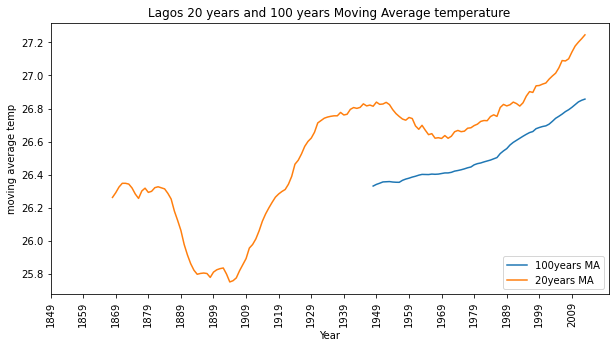

In [14]:
20_years_MA_line_chart = lagos_global_data[['20years MA_lagos (deg. C)','100years MA_global (deg. C)']]

plt.figure(figsize=(10, 5))
plt.title('Lagos 20 years and 100 years Moving Average temperature')
plt.plot(lagos_temp.index, lagos_temp[['100years MA', '20years MA']])
plt.xlabel('Year')
plt.ylabel('moving average temp')
plt.xticks(lagos_temp.index[::10], rotation='vertical')
plt.legend(('100years MA','20years MA'), loc='lower right')

plt.show()


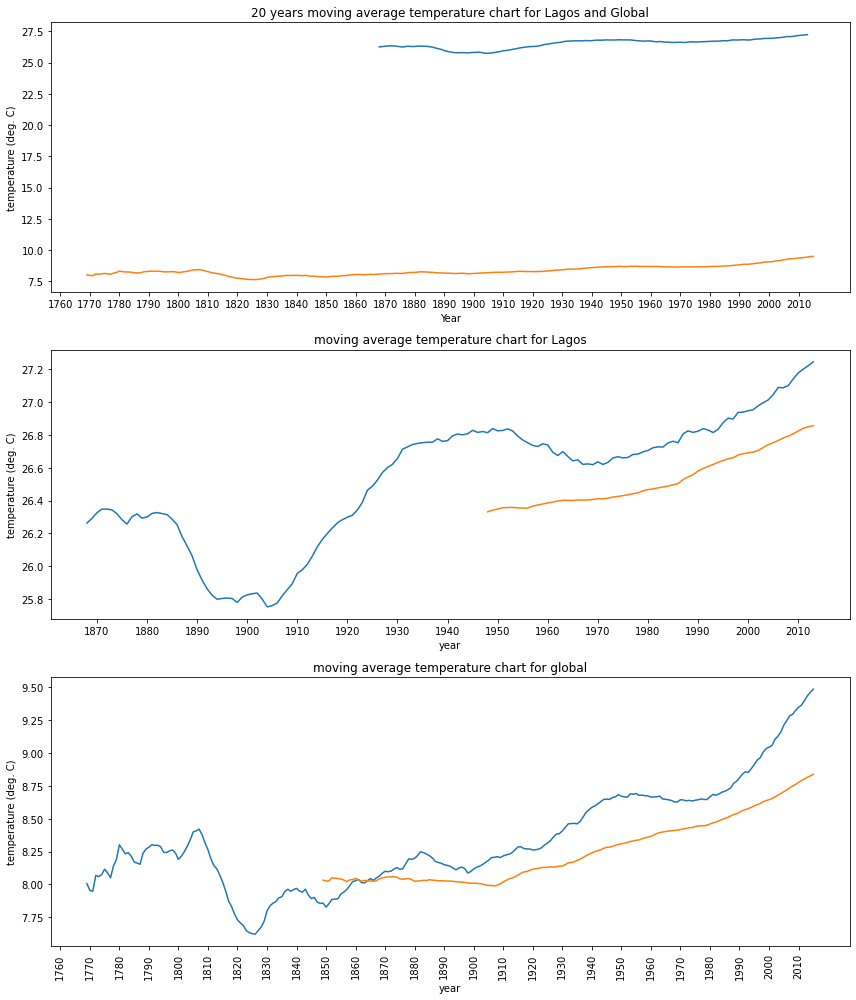

In [98]:
# plotting moving average temperature



fig, (ax3, ax1, ax2) = plt.subplots(3, figsize=(12, 14))

ax1.set_xticks(lagos_global_data.index[::10])
ax1.set_xlabel('year')
ax1.set_ylabel('temperature (deg. C)')
ax1.set_title('moving average temperature chart for Lagos')


ax2.set_xticks(lagos_global_data.index[::10])
ax2.set_xlabel('year')
ax2.set_ylabel('temperature (deg. C)')
ax2.set_title('moving average temperature chart for global')


ax3.set_xticks(lagos_global_data.index[::10])
ax3.set_xlabel('Year')
ax3.set_ylabel('temperature (deg. C)')
ax3.set_title('20 years moving average temperature chart for Lagos and Global')

degrees = 90
plt.xticks(rotation=degrees)


ax3.plot(lagos_global_data.index, lagos_global_data[['20years MA_lagos (deg. C)', '20years MA_global (deg. C)']])
ax1.plot(lagos_global_data.index, lagos_global_data[['20years MA_lagos (deg. C)', '100years MA_lagos (deg. C)']])
ax2.plot(lagos_global_data.index, lagos_global_data[['20years MA_global (deg. C)', '100years MA_global (deg. C)']])


fig.tight_layout()






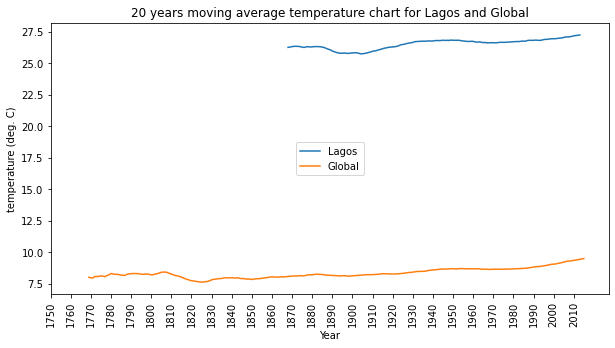

In [23]:

plt.figure(figsize=(10, 5))
plt.title('20 years moving average temperature chart for Lagos and Global')
plt.plot(lagos_global_data.index, lagos_global_data[['20years MA_lagos (deg. C)', '20years MA_global (deg. C)']])
plt.xlabel('Year')
plt.ylabel('temperature (deg. C)')
plt.xticks(lagos_global_data.index[::10], rotation='vertical')
plt.legend(('Lagos','Global'), loc='center')

plt.show()
